In [1]:
!pip install requests bs4 pandas matplotlib wget

In [2]:

import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="S4I0W3J2E4P7ZRUz7gi13K6LhXo2+5qE2/KHyaHMcuE=">
    
    
    
    .bank {display:none}
    </style>

    <noscript>
        <style>
            tabl

In [3]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr')

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send

    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("-" * 60)
    rates.append(currency_dict)

pprint(rates)
     

[{'幣別': '美金 (USD)', '現金買入': '32.48', '現金賣出': '33.15'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.074', '現金賣出': '4.278'},
 {'幣別': '英鎊 (GBP)', '現金買入': '41.3', '現金賣出': '43.42'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.37', '現金賣出': '21.15'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.4', '現金賣出': '23.31'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '24.13', '現金賣出': '25.04'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '36.62', '現金賣出': '37.82'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2138', '現金賣出': '0.2266'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.32', '現金賣出': '19.17'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8458', '現金賣出': '1.0358'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5062', '現金賣出': '0.6382'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '34.86', '現金賣出': '36.2'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.02094', '現金賣出': '0.02484'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00106', '現金賣出': '0.00147'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.413', '現金賣出': '7.938'}

In [4]:
def filter_func(item:dict)->bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True

filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '現金買入': '32.48', '現金賣出': '33.15'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.074', '現金賣出': '4.278'},
 {'幣別': '英鎊 (GBP)', '現金買入': '41.3', '現金賣出': '43.42'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.37', '現金賣出': '21.15'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.4', '現金賣出': '23.31'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '24.13', '現金賣出': '25.04'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '36.62', '現金賣出': '37.82'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2138', '現金賣出': '0.2266'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.32', '現金賣出': '19.17'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8458', '現金賣出': '1.0358'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5062', '現金賣出': '0.6382'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '34.86', '現金賣出': '36.2'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.02094', '現金賣出': '0.02484'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00106', '現金賣出': '0.00147'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.413', '現金賣出': '7.938'},
 {'幣別': '人民幣 (CNY)', '現金買入': '4.435', '現金賣出': '4.597'}]

In [5]:
def map_func(item:dict)->dict:
    item["現金買入"] = float(item["現金買入"])
    item["現金賣出"] = float(item["現金賣出"])
    return item

cleared_list= list(map(map_func,filtered_rates))
cleared_list

[{'幣別': '美金 (USD)', '現金買入': 32.48, '現金賣出': 33.15},
 {'幣別': '港幣 (HKD)', '現金買入': 4.074, '現金賣出': 4.278},
 {'幣別': '英鎊 (GBP)', '現金買入': 41.3, '現金賣出': 43.42},
 {'幣別': '澳幣 (AUD)', '現金買入': 20.37, '現金賣出': 21.15},
 {'幣別': '加拿大幣 (CAD)', '現金買入': 22.4, '現金賣出': 23.31},
 {'幣別': '新加坡幣 (SGD)', '現金買入': 24.13, '現金賣出': 25.04},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': 36.62, '現金賣出': 37.82},
 {'幣別': '日圓 (JPY)', '現金買入': 0.2138, '現金賣出': 0.2266},
 {'幣別': '紐元 (NZD)', '現金買入': 18.32, '現金賣出': 19.17},
 {'幣別': '泰幣 (THB)', '現金買入': 0.8458, '現金賣出': 1.0358},
 {'幣別': '菲國比索 (PHP)', '現金買入': 0.5062, '現金賣出': 0.6382},
 {'幣別': '印尼幣 (IDR)', '現金買入': 0.00168, '現金賣出': 0.00238},
 {'幣別': '歐元 (EUR)', '現金買入': 34.86, '現金賣出': 36.2},
 {'幣別': '韓元 (KRW)', '現金買入': 0.02094, '現金賣出': 0.02484},
 {'幣別': '越南盾 (VND)', '現金買入': 0.00106, '現金賣出': 0.00147},
 {'幣別': '馬來幣 (MYR)', '現金買入': 6.413, '現金賣出': 7.938},
 {'幣別': '人民幣 (CNY)', '現金買入': 4.435, '現金賣出': 4.597}]

In [6]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df = df.sort_values(by="現金買入",ascending=False)
df.head()

,幣別,現金買入,現金賣出
2,英鎊 (GBP),41.30,43.42
6,瑞士法郎 (CHF),36.62,37.82
12,歐元 (EUR),34.86,36.20
0,美金 (USD),32.48,33.15
5,新加坡幣 (SGD),24.13,25.04


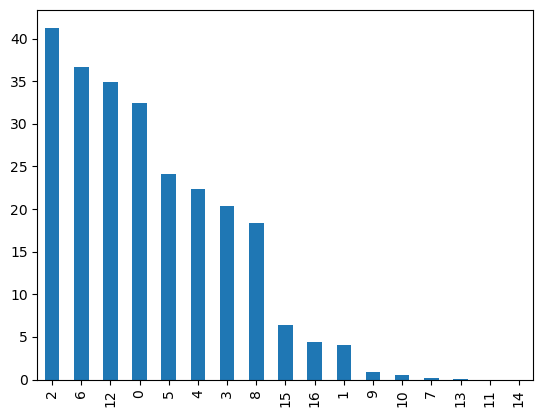

In [7]:
import matplotlib.pyplot as plt
df['現金買入'].plot(kind='bar')
plt.show()

In [8]:
df['幣別'].apply(lambda x: x.split()[-1])

2     (GBP)
6     (CHF)
12    (EUR)
0     (USD)
5     (SGD)
4     (CAD)
3     (AUD)
8     (NZD)
15    (MYR)
16    (CNY)
1     (HKD)
9     (THB)
10    (PHP)
7     (JPY)
13    (KRW)
11    (IDR)
14    (VND)
Name: 幣別, dtype: object

In [9]:
import wget
wget.download('https://github.com/roberthsu2003/__2025_01_04_chihlee__/raw/refs/heads/main/ChineseFont.ttf')

     

'ChineseFont.ttf'

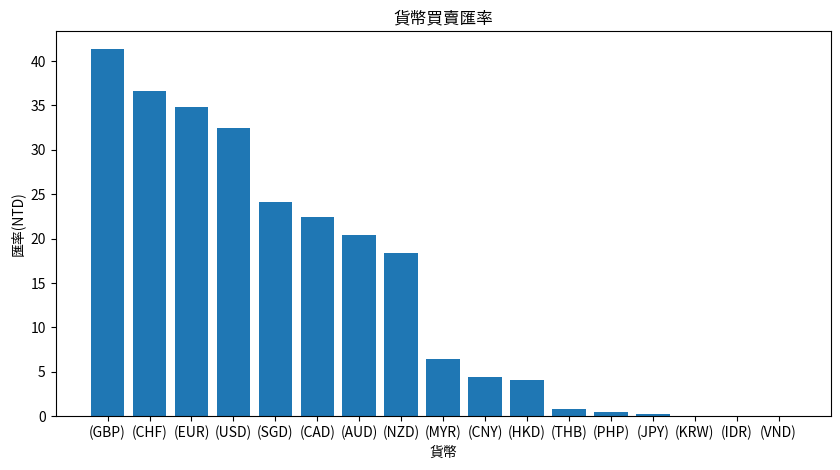

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')
# 1.製作figure
fig = plt.figure(figsize=(10, 5))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['現金買入'])
ax_1.set_title('貨幣買賣匯率')
ax_1.set_xlabel('貨幣')
ax_1.set_ylabel('匯率(NTD)')
plt.show()
     

In [13]:
import pandas as pd

df = pd.read_csv('world.csv')
df.head()

,ID,iso_code,洲名,國家,日期,總確診數,新增確診數,七天移動平均新增確診數,總死亡數,新增死亡數,...,七天移動平均疫苗新增接種劑數,每百人接種疫苗劑數,每百人接種疫苗人數,疫情控管指數,總人口數,中位數年紀,70歲以上人口比例,平均壽命,解除隔離數,解封指數
0,1,AFG,亞洲,阿富汗,2020-02-24,5,5,0.0,0,0,...,0.0,0.0,0.0,8.33,39835428,18.6,1.337,64.83,0,99999.0
1,2,AFG,亞洲,阿富汗,2020-02-25,5,0,0.0,0,0,...,0.0,0.0,0.0,8.33,39835428,18.6,1.337,64.83,0,99999.0
2,3,AFG,亞洲,阿富汗,2020-02-26,5,0,0.0,0,0,...,0.0,0.0,0.0,8.33,39835428,18.6,1.337,64.83,0,99999.0
3,4,AFG,亞洲,阿富汗,2020-02-27,5,0,0.0,0,0,...,0.0,0.0,0.0,8.33,39835428,18.6,1.337,64.83,0,99999.0
4,5,AFG,亞洲,阿富汗,2020-02-28,5,0,0.0,0,0,...,0.0,0.0,0.0,8.33,39835428,18.6,1.337,64.83,0,99999.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187885 entries, 0 to 187884
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              187885 non-null  int64  
 1   iso_code        187885 non-null  object 
 2   洲名              187885 non-null  object 
 3   國家              187885 non-null  object 
 4   日期              187885 non-null  object 
 5   總確診數            187885 non-null  int64  
 6   新增確診數           187885 non-null  int64  
 7   七天移動平均新增確診數     187885 non-null  float64
 8   總死亡數            187885 non-null  int64  
 9   新增死亡數           187885 non-null  int64  
 10  七天移動平均新增死亡數     187885 non-null  float64
 11  每百萬人確診數         187885 non-null  float64
 12  每百萬人死亡數         187885 non-null  float64
 13  傳染率             187885 non-null  float64
 14  新增檢驗件數          187885 non-null  int64  
 15  總檢驗件數           187885 non-null  int64  
 16  每千人檢驗件數         187885 non-null  float64
 17  七天移動平均新增檢驗

In [15]:
df.tail()

,ID,iso_code,洲名,國家,日期,總確診數,新增確診數,七天移動平均新增確診數,總死亡數,新增死亡數,...,七天移動平均疫苗新增接種劑數,每百人接種疫苗劑數,每百人接種疫苗人數,疫情控管指數,總人口數,中位數年紀,70歲以上人口比例,平均壽命,解除隔離數,解封指數
187880,187881,ZWE,非洲,辛巴威,2022-07-02,255586,0,39.571,5555,0,...,6190.0,79.41,41.81,0.0,15092171,19.6,1.882,61.49,0,99999.0
187881,187882,ZWE,非洲,辛巴威,2022-07-03,255586,0,33.000,5555,0,...,8710.0,79.55,41.86,0.0,15092171,19.6,1.882,61.49,0,99999.0
187882,187883,ZWE,非洲,辛巴威,2022-07-04,255726,140,49.000,5558,3,...,10797.0,79.67,41.90,0.0,15092171,19.6,1.882,61.49,0,99999.0
187883,187884,ZWE,非洲,辛巴威,2022-07-05,255755,29,53.143,5558,0,...,10821.0,79.68,41.90,0.0,15092171,19.6,1.882,61.49,0,99999.0
187884,187885,ZWE,非洲,辛巴威,2022-07-06,255805,50,40.714,5560,2,...,0.0,0.00,0.00,0.0,15092171,19.6,1.882,61.49,0,99999.0


In [16]:
df1 = df[['洲名','國家','日期','總確診數','新增確診數','總人口數','解封指數']]
df1.head()

,洲名,國家,日期,總確診數,新增確診數,總人口數,解封指數
0,亞洲,阿富汗,2020-02-24,5,5,39835428,99999.0
1,亞洲,阿富汗,2020-02-25,5,0,39835428,99999.0
2,亞洲,阿富汗,2020-02-26,5,0,39835428,99999.0
3,亞洲,阿富汗,2020-02-27,5,0,39835428,99999.0
4,亞洲,阿富汗,2020-02-28,5,0,39835428,99999.0


In [17]:
df1.iloc[187884]

洲名               非洲
國家              辛巴威
日期       2022-07-06
總確診數         255805
新增確診數            50
總人口數       15092171
解封指數        99999.0
Name: 187884, dtype: object

In [18]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Age': [25, 30, 22, 35, 28],
        'City': ['NewYork', 'London', 'Paris', 'Tokyo', 'NewYork'],
        'Score': [90, 85, 95, 78, 92]}

df_test = pd.DataFrame(data)
df_test

,Name,Age,City,Score
0,Alice,25,NewYork,90
1,Bob,30,London,85
2,Charlie,22,Paris,95
3,David,35,Tokyo,78
4,Eva,28,NewYork,92


In [19]:
#布林遮照
mask = df_test['Score'] >= 90
mask

0     True
1    False
2     True
3    False
4     True
Name: Score, dtype: bool

In [20]:
df_test[mask]

,Name,Age,City,Score
0,Alice,25,NewYork,90
2,Charlie,22,Paris,95
4,Eva,28,NewYork,92


In [21]:
country_mask = df1['國家'] == '日本'
df1[country_mask]

,洲名,國家,日期,總確診數,新增確診數,總人口數,解封指數
85626,亞洲,日本,2020-01-22,2,0,126050796,99999.0
85627,亞洲,日本,2020-01-23,2,0,126050796,99999.0
85628,亞洲,日本,2020-01-24,2,0,126050796,99999.0
85629,亞洲,日本,2020-01-25,2,0,126050796,99999.0
85630,亞洲,日本,2020-01-26,4,2,126050796,99999.0
...,...,...,...,...,...,...,...
86518,亞洲,日本,2022-07-02,9364954,24875,126050796,99999.0
86519,亞洲,日本,2022-07-03,9388222,23268,126050796,99999.0
86520,亞洲,日本,2022-07-04,9405007,16785,126050796,99999.0
86521,亞洲,日本,2022-07-05,9441171,36164,126050796,99999.0


In [ ]:
taiwan_mask = (df1['國家'] == '台灣') & (df1['新增確診數'] >= 100000)
df1[taiwan_mask]

In [22]:
taiwan_mask = (df1['國家'] == '台灣') & (df1['新增確診數'] >= 100000)
df1[taiwan_mask]

,洲名,國家,日期,總確診數,新增確診數,總人口數,解封指數
164830,亞洲,台灣,2022-05-09,397504,128935,23855008,25.86
164835,亞洲,台灣,2022-05-14,699824,128954,23855008,46.24


In [23]:
df1.query('國家=="台灣" and 新增確診數>=100000')

,洲名,國家,日期,總確診數,新增確診數,總人口數,解封指數
164830,亞洲,台灣,2022-05-09,397504,128935,23855008,25.86
164835,亞洲,台灣,2022-05-14,699824,128954,23855008,46.24
